<a href="https://colab.research.google.com/github/rasugurav/Boston_Crime/blob/main/Boston_Crime_Incident_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Crime_data=pd.read_csv("/content/crime-incident-reports-2018.csv")

In [4]:
Crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


In [5]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87047 entries, 0 to 87046
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      87047 non-null  object 
 1   OFFENSE_CODE         87047 non-null  int64  
 2   OFFENSE_CODE_GROUP   87047 non-null  object 
 3   OFFENSE_DESCRIPTION  87047 non-null  object 
 4   DISTRICT             86430 non-null  object 
 5   REPORTING_AREA       87047 non-null  object 
 6   SHOOTING             350 non-null    object 
 7   OCCURRED_ON_DATE     87047 non-null  object 
 8   YEAR                 87047 non-null  int64  
 9   MONTH                87047 non-null  int64  
 10  DAY_OF_WEEK          87047 non-null  object 
 11  HOUR                 87047 non-null  int64  
 12  UCR_PART             87030 non-null  object 
 13  STREET               85632 non-null  object 
 14  Lat                  81382 non-null  float64
 15  Long                 81382 non-null 

In [6]:
Crime_data.describe(include='all')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,87047,87047.000000,87047,87047,86430,87047,350,87047,87047.0,87047.000000,87047,87047.000000,87030,85632,81382.000000,81382.000000,87046
unique,76489,NaN,61,181,12,877,1,62721,NaN,NaN,7,NaN,4,3492,NaN,NaN,12543
top,I182051210,NaN,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2018-05-01 00:00:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,14,NaN,10239,6037,13820,5989,350,22,NaN,NaN,13180,NaN,45018,4061,NaN,NaN,5664
mean,NaN,2351.542075,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,7.251163,NaN,13.052558,NaN,NaN,42.164350,-70.828214,NaN
std,NaN,1179.208316,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.940440,NaN,6.276761,NaN,NaN,2.608153,4.219075,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-71.178674,NaN
25%,NaN,1102.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,5.000000,NaN,9.000000,NaN,NaN,42.296999,-71.097437,NaN
50%,NaN,3006.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,7.000000,NaN,14.000000,NaN,NaN,42.325452,-71.077668,NaN
75%,NaN,3202.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,10.000000,NaN,18.000000,NaN,NaN,42.348288,-71.062595,NaN


In [7]:
Crime_data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 617
REPORTING_AREA             0
SHOOTING               86697
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  17
STREET                  1415
Lat                     5665
Long                    5665
Location                   1
dtype: int64

# `New Section`

---

**There are missing Values**
we need to deal with missing values first


*   SHOOTING is having maximum number of count which shows that other than shooting records are there 
*   We will drop column SHOOTING as prediction of 98486 items is difficult task



In [8]:
Crime_data.drop('SHOOTING',inplace=True,axis=1)

In [9]:
Crime_data.nunique()

INCIDENT_NUMBER        76489
OFFENSE_CODE             181
OFFENSE_CODE_GROUP        61
OFFENSE_DESCRIPTION      181
DISTRICT                  12
REPORTING_AREA           877
OCCURRED_ON_DATE       62721
YEAR                       1
MONTH                     12
DAY_OF_WEEK                7
HOUR                      24
UCR_PART                   4
STREET                  3492
Lat                    12536
Long                   12535
Location               12543
dtype: int64

In [28]:
Crime_data['OCCURRED_ON_DATE']=pd.to_datetime(Crime_data['OCCURRED_ON_DATE'])

In [30]:
Crime_data['DAY_OF_WEEK']=pd.Categorical(Crime_data['DAY_OF_WEEK'],
                                         categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
                                         ordered=True)

In [31]:
Crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,OCCURED_ON_DATE
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30 09:00:00
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",2018-03-06 08:00:00
2,I192076660,2629,Harassment,HARASSMENT,E5,662,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",2018-10-31 12:00:00
3,I192075386,2629,Harassment,HARASSMENT,A1,96,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",2018-04-09 08:43:00
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",2018-01-01 00:00:00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text major ticklabel objects>)

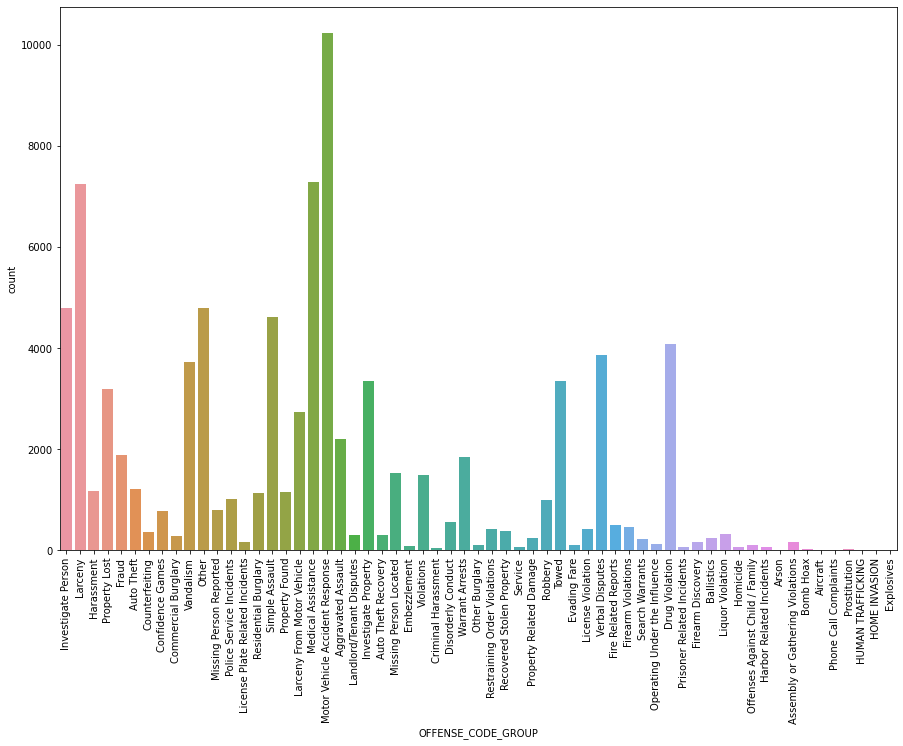

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(x='OFFENSE_CODE_GROUP',data=Crime_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

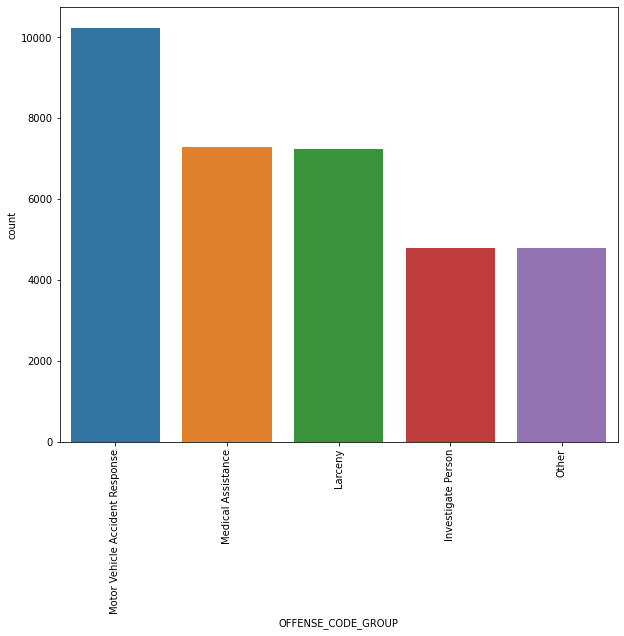

In [39]:
plt.figure(figsize=(10,8))
order=Crime_data['OFFENSE_CODE_GROUP'].value_counts().head(5).index
sns.countplot(x='OFFENSE_CODE_GROUP',order=order,data=Crime_data)
plt.xticks(rotation=90)

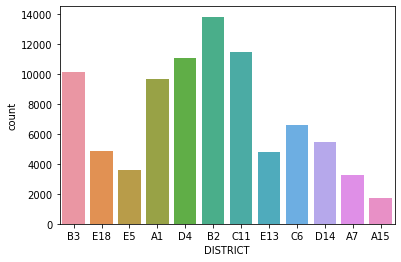

In [11]:
sns.countplot(x='DISTRICT',data=Crime_data)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

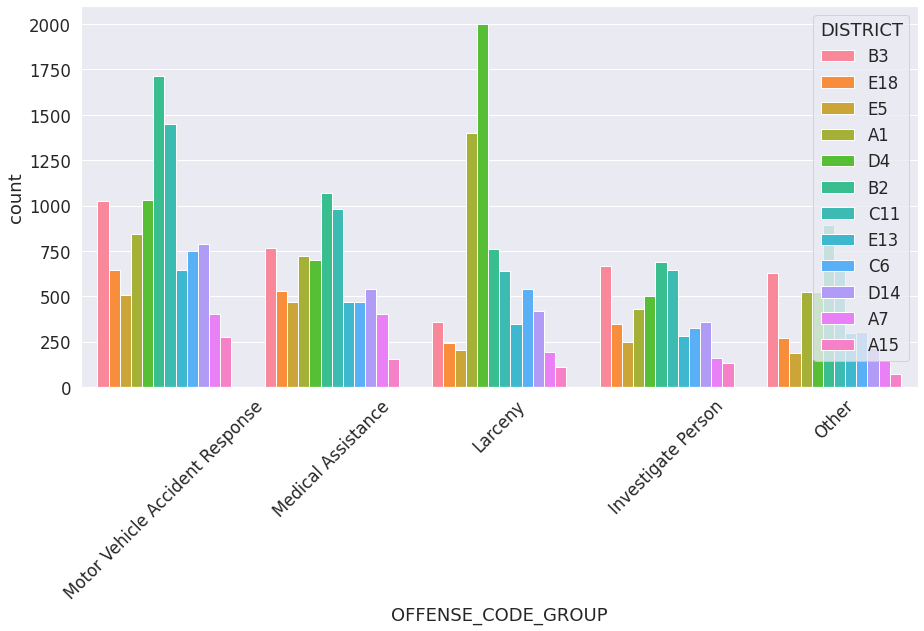

In [46]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
order=Crime_data['OFFENSE_CODE_GROUP'].value_counts().head(5).index
sns.countplot(x='OFFENSE_CODE_GROUP',order=order,data=Crime_data,hue='DISTRICT',saturation=2,linewidth=1)
plt.xticks(rotation=45)

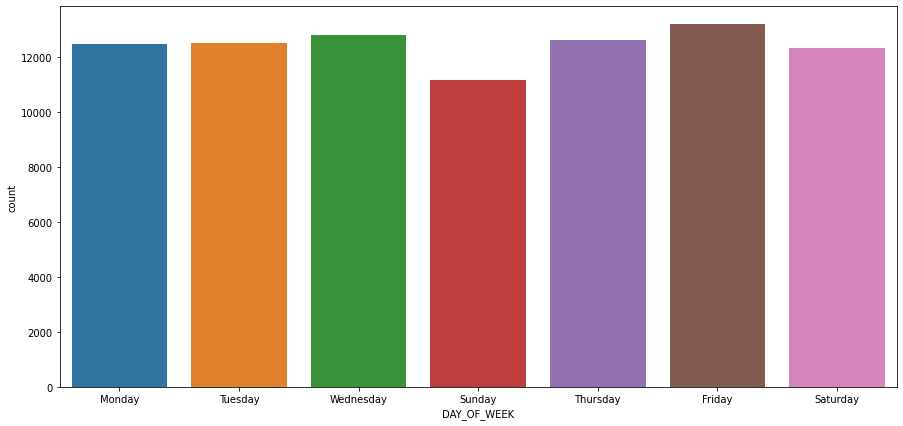

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='DAY_OF_WEEK',data=Crime_data)

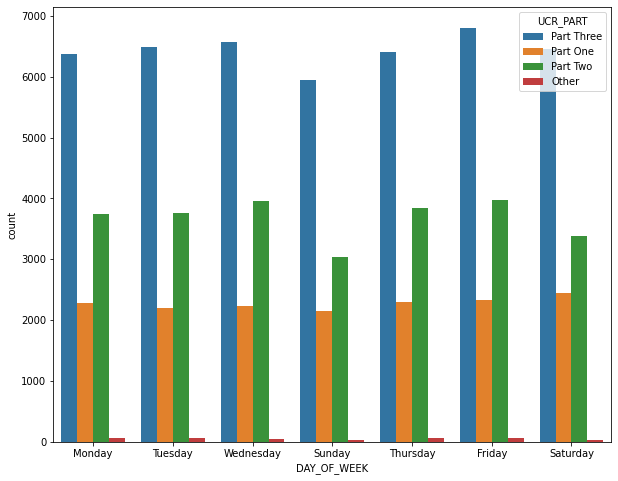

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='DAY_OF_WEEK',hue='UCR_PART',data=Crime_data)

In [48]:
Crime_data=Crime_data.dropna(axis=0)

In [49]:
Crime_data.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
OCCURED_ON_DATE        0
dtype: int64

In [51]:
Crime_data.shape

(70223, 17)